# Regressão 01 - tarefa 01

### 1. Explorando a base de gorjetas

a. Na aula fizemos uma regressão de ```tip``` explicada por ```net_bill```. Carregue os pacotes e a base, crie as variáveis necessárias como na aula, e reproduza esta regressão.

b. Reproduza também o gráfico de dispersão dessas duas variáveis.

In [14]:
import pandas as pd
import seaborn as sns
from seaborn import load_dataset
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import tree
import matplotlib.pyplot as plt

import numpy as np

import statsmodels.formula.api as smf

In [3]:
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


In [4]:
reg = smf.ols('tip ~ net_bill', data = tips).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Fri, 07 Apr 2023   Prob (F-statistic):           5.02e-23
Time:                        21:23:13   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307      0.168      7.907      0.000       0.999       1.662
net_bill       0.0993      0.009     10.980      0.000       0.082       0.117
==============================================================================
Omnibus:                       33.873   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.942
Skew:                           0.754   Prob(JB):                     9.63e-14
Kurtosis:                       4.903   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

(0.0, 10.5)

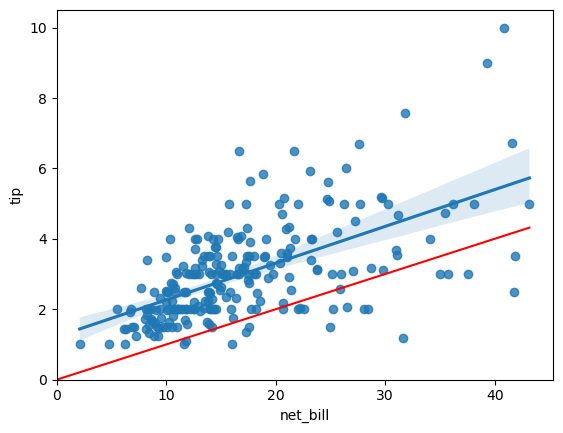

In [5]:
sns.regplot(y = 'tip', x = 'net_bill', data = tips[tips['tip_pct']<.5])

# Gerando dados para a linha dos 10%
x = np.linspace(0,tips['net_bill'].max(),100)
y = .1*x

# Plotando a linha dos 10%
plt.plot(x, y, '-r', label='linha dos 10%')

# Opções estéticas para explicitar o (0,0) no gráfico
plt.xlim(left = 0)
plt.ylim(bottom = 0)

### 2. Mudança de perspectiva

Agora ajuste um modelo de regressão de ```tip_pct``` por ```net_bill```. Construa o gráfico de dispersão correspondente.

In [6]:
reg = smf.ols('tip_pct ~ net_bill', data = tips).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     24.31
Date:                Fri, 07 Apr 2023   Prob (F-statistic):           1.52e-06
Time:                        21:23:13   Log-Likelihood:                 108.00
No. Observations:                 244   AIC:                            -212.0
Df Residuals:                     242   BIC:                            -205.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3053      0.023     13.166      0.000       0.260       0.351
net_bill      -0.0061      0.001     -4.931      0.000      -0.009      -0.004
==============================================================================
Omnibus:                      468.674   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           234437.604
Skew:                          11.104   Prob(JB):                         0.00
Kurtosis:                     153.221   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

(0.0, 4.53285)

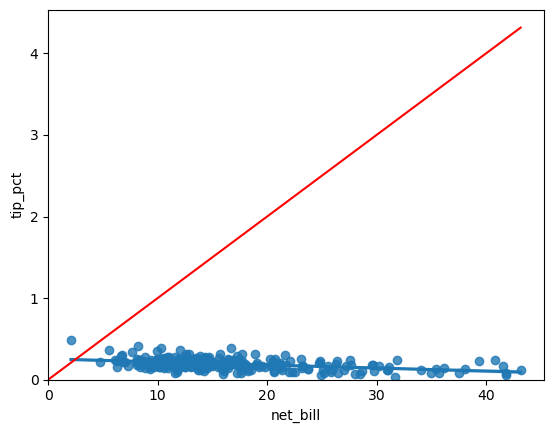

In [7]:
sns.regplot(y = 'tip_pct', x = 'net_bill', data = tips[tips['tip_pct']<.5])

# Gerando dados para a linha dos 10%
x = np.linspace(0,tips['net_bill'].max(),100)
y = .1*x

# Plotando a linha dos 10%
plt.plot(x, y, '-r', label='linha dos 10%')

# Opções estéticas para explicitar o (0,0) no gráfico
plt.xlim(left = 0)
plt.ylim(bottom = 0)

### 3. Comente

Compare os dois gráficos e comente (de forma objetiva e suscinta) a relação entre eles e a diferença do ajuste. Podemos comparar diretamente os $R^2$s?

Os gráficos mostram uma disperção diferente e no segundo gráfico a linha de tendência ficou bem descolada da linha média. Os R² não podem ser comparados (alfa e beta muito diferentes entre si) e levando em consideração que os gráficos apresentam a mesma escala a variância deles provavelmente são bem diferentes. 

### 4. Ajuste do modelo em outra escala

Com o modelo no item 3, obtenha a preditiva do valor da gorjeta:
  1. obtenha o valor predito ```pred``` para ```tip_pct``` (dica, veja o atributo ```reg.fittedvalues```)
  2. obtenha o valor predito para ```tip``` como ```tip_pct * net_bill```
  3. calcule o $R^2$ do modelo para ```tip```
  4. compare esse $R^2$ com o do item 1

In [8]:
tips['tip_pct_pred'] = reg.fittedvalues
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill,tip_pct_pred
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98,0.207087
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68,0.251951
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51,0.197684
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37,0.180107
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98,0.176358


In [12]:
tips['tip_pred'] = tips['tip_pct_pred'] * tips['net_bill']

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill,tip_pct_pred,tip_pred
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98,0.207087,3.309254
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68,0.251951,2.186938
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51,0.197684,3.461450
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37,0.180107,3.668785
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98,0.176358,3.699998


In [18]:
X = tips.drop(columns = ['tip', 'tip_pct_pred']).copy()

X = pd.get_dummies(X, drop_first = True)
print(X.info())
X.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   total_bill   244 non-null    float64
 1   size         244 non-null    int64  
 2   tip_pct      244 non-null    float64
 3   net_bill     244 non-null    float64
 4   tip_pred     244 non-null    float64
 5   sex_Female   244 non-null    uint8  
 6   smoker_No    244 non-null    uint8  
 7   day_Fri      244 non-null    uint8  
 8   day_Sat      244 non-null    uint8  
 9   day_Sun      244 non-null    uint8  
 10  time_Dinner  244 non-null    uint8  
dtypes: float64(4), int64(1), uint8(6)
memory usage: 11.1 KB
None


,total_bill,size,tip_pct,net_bill,tip_pred,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner
0,16.99,2,0.063204,15.98,3.309254,1,1,0,0,1,1
1,10.34,3,0.191244,8.68,2.186938,0,1,0,0,1,1
2,21.01,3,0.199886,17.51,3.461450,0,1,0,0,1,1
3,23.68,2,0.162494,20.37,3.668785,0,1,0,0,1,1
4,24.59,4,0.172069,20.98,3.699998,1,1,0,0,1,1


In [19]:
y =  tips.loc[:,'tip']

y.head()

0    1.01
1    1.66
2    3.50
3    3.31
4    3.61
Name: tip, dtype: float64

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2360873)

In [22]:
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=8)

regr_1.fit(X_train, y_train)
regr_2.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8)

In [23]:
# mse1 = mean_squared_error(y_test, regr_1.predict(X_test))
mse1 = regr_1.score(X_train, y_train)
mse2 = regr_2.score(X_train, y_train)

template = "O MSE da árvore com profundidade={0} é: {1:.2f}"

print(template.format(regr_1.get_depth(),mse1).replace(".",","))
print(template.format(regr_2.get_depth(),mse2).replace(".",","))

O MSE da árvore com profundidade=2 é: 0,60
O MSE da árvore com profundidade=8 é: 1,00


In [24]:
y_1 =  tips.loc[:,'tip_pct_pred']

y_1.head()

0    0.207087
1    0.251951
2    0.197684
3    0.180107
4    0.176358
Name: tip_pct_pred, dtype: float64

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y_1, random_state=2360873)

In [26]:
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=8)

regr_1.fit(X_train, y_train)
regr_2.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8)

In [27]:
# mse1 = mean_squared_error(y_test, regr_1.predict(X_test))
mse1 = regr_1.score(X_train, y_train)
mse2 = regr_2.score(X_train, y_train)

template = "O MSE da árvore com profundidade={0} é: {1:.2f}"

print(template.format(regr_1.get_depth(),mse1).replace(".",","))
print(template.format(regr_2.get_depth(),mse2).replace(".",","))

O MSE da árvore com profundidade=2 é: 0,90
O MSE da árvore com profundidade=8 é: 1,00


O R² da coluna 'tip' e da coluna 'tip_pct_pred' para a profundidade 8 ficou inalterado, porém para a profunidade 2, o erro quadrático médio ficou mais elevado, representando um distanciamento do benchmark.

In [28]:
reg = smf.ols('tip_pct_pred ~ net_bill', data = tips).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           tip_pct_pred   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.845e+32
Date:                Fri, 07 Apr 2023   Prob (F-statistic):               0.00
Time:                        21:51:39   Log-Likelihood:                 8782.8
No. Observations:                 244   AIC:                        -1.756e+04
Df Residuals:                     242   BIC:                        -1.755e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3053   8.42e-18   3.63e+16      0.000       0.305       0.305
net_bill      -0.0061   4.52e-19  -1.36e+16      0.000      -0.006      -0.006
==============================================================================
Omnibus:                      259.422   Durbin-Watson:                   0.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            34204.222
Skew:                           3.737   Prob(JB):                         0.00
Kurtosis:                      60.520   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
reg = smf.ols('tip ~ net_bill', data = tips).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Fri, 07 Apr 2023   Prob (F-statistic):           5.02e-23
Time:                        21:52:00   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307      0.168      7.907      0.000       0.999       1.662
net_bill       0.0993      0.009     10.980      0.000       0.082       0.117
==============================================================================
Omnibus:                       33.873   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.942
Skew:                           0.754   Prob(JB):                     9.63e-14
Kurtosis:                       4.903   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""